In [1]:
import numpy as np
import cv2
import torch
import torchvision
import os
from PIL import Image
from torchvision.models.detection import fasterrcnn_resnet50_fpn as frc
from torchvision import transforms
import matplotlib.pyplot as plt

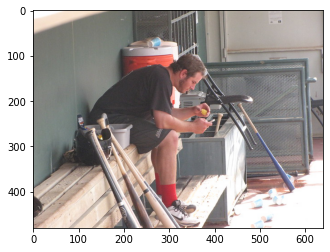

In [10]:
preprocess = transforms.Compose([
    transforms.ToTensor(),
])

test_img = Image.open("test1.jpg")
cv_img = cv2.imread("test1.jpg")
img_tensor = preprocess(test_img)[None,:,:,:]
plt.imshow(img_tensor[0].numpy().transpose(1,2,0))

In [42]:
labels = []
with open("coco.names", "r") as f:
    for row in f:
        labels.append(str(row[:-1]))

In [30]:
model = frc(pretrained = True)
model.eval()
pred = model(img_tensor)
print(pred)

[{'boxes': tensor([[140.1713, 113.4065, 398.3969, 464.6978],
        [532.0162, 405.1139, 552.5370, 429.8383],
        [168.9256, 249.4196, 216.3234, 307.7506],
        [141.7272, 228.3306, 174.0573, 336.4935],
        [103.9949, 250.4910, 311.4838, 480.0000],
        [340.7714, 114.5413, 497.1225, 304.8919],
        [370.3343, 216.9386, 385.3895, 232.5603],
        [233.2627,  57.6658, 289.1900,  83.4452],
        [382.0732, 229.5922, 403.3877, 246.1852],
        [167.2868, 297.6364, 272.8480, 475.5127],
        [485.1608, 461.5854, 510.1272, 480.0000],
        [384.4549, 238.4117, 401.8442, 246.0346],
        [485.0795, 456.5337, 512.4335, 480.0000],
        [304.0074, 170.2538, 314.6962, 212.0017],
        [ 86.3681, 254.2604, 140.5515, 338.8316],
        [451.5173, 207.9332, 503.0028, 305.2359],
        [141.5263, 231.8494, 217.8601, 305.0185],
        [370.1991, 217.0780, 386.8428, 232.9956],
        [504.6806, 441.5719, 529.7950, 466.5364],
        [275.3219, 354.8020, 433.3787, 

In [33]:
mask = (pred[0]['scores'] > 0.7).int()
print(mask)
idx = (torch.nonzero(mask)).view(-1)
print(idx)
for key, val in pred[0].items():
    pred[0][key] = pred[0][key][idx]
print(pred)

tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=torch.int32)
tensor([0, 1, 2, 3, 4])
[{'boxes': tensor([[140.1713, 113.4065, 398.3969, 464.6978],
        [532.0162, 405.1139, 552.5370, 429.8383],
        [168.9256, 249.4196, 216.3234, 307.7506],
        [141.7272, 228.3306, 174.0573, 336.4935],
        [103.9949, 250.4910, 311.4838, 480.0000]], grad_fn=<IndexBackward>), 'labels': tensor([ 1, 47, 47, 44, 39]), 'scores': tensor([0.9906, 0.9320, 0.8491, 0.7180, 0.7089], grad_fn=<IndexBackward>)}]


In [56]:
cv_img = cv2.imread("test1.jpg")
i = 0
for row in pred[0]['boxes']:
    color = (np.random.randint(0,256),np.random.randint(0,256),np.random.randint(0,256))
    cv_img = cv2.rectangle(cv_img,(row[0],row[1]),(row[2],row[3]),color,2)
    text = str(labels[pred[0]['labels'][i]-1]) + " : " + str(int(pred[0]['scores'][i]*100)) + "%"
    cv2.putText(cv_img, text, (row[0],row[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 1, color,2)
    i += 1
    

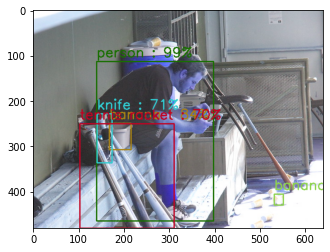

In [57]:
plt.imshow(cv_img)

In [36]:
os.chdir("/media/sowrya/DATA/My/Research/Faster-RCNN")
with torch.cuda.device(0):
    labels = []
    with open("coco.names", "r") as f:
        for row in f:
            labels.append(str(row[:-1]))
    cwd = os.getcwd()
    dir_1 = cwd + "/New Test"
    dir_2 = cwd + "/Attacked"
    preprocess = transforms.Compose([
        transforms.ToTensor(),
    ])
    model = frc(pretrained = True)
    model.eval()
    '''
    os.chdir(dir_1)
    names = os.listdir(dir_1)
    for image in names:
        try:
            filename = "Box_" + str(image)
            test_img = Image.open(image)
            cv_img = cv2.imread(image)
            img_tensor = preprocess(test_img)[None,:,:,:]
            pred = model(img_tensor)
            mask = (pred[0]['scores'] > 0.9).int()
            idx = (torch.nonzero(mask)).view(-1)
            for key, val in pred[0].items():
                pred[0][key] = pred[0][key][idx]
            i = 0
            for row,label,score in zip(pred[0]['boxes'], pred[0]['labels'], pred[0]['scores']):
                color = (np.random.randint(0,256),np.random.randint(0,256),np.random.randint(0,256))
                cv_img = cv2.rectangle(cv_img,(row[0],row[1]),(row[2],row[3]),color,2)
                text = str(labels[label-1]) + ": " + str(int(score*100)) + "%"
                cv2.putText(cv_img, text, (row[0],row[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 1, color,2)
                i += 1
            cv2.imwrite(filename, cv_img)
        except:
            print(image)
        '''
    os.chdir(dir_2)
    names = os.listdir(dir_2)
    for image in names:
        try:
            filename = "Box_" + str(image)
            test_img = Image.open(image)
            cv_img = cv2.imread(image)
            img_tensor = preprocess(test_img)[None,:,:,:]
            pred = model(img_tensor)
            mask = (pred[0]['scores'] > 0.9).int()
            idx = (torch.nonzero(mask)).view(-1)
            for key, val in pred[0].items():
                pred[0][key] = pred[0][key][idx]
            i = 0
            for row,label,score in zip(pred[0]['boxes'], pred[0]['labels'], pred[0]['scores']):
                color = (np.random.randint(0,256),np.random.randint(0,256),np.random.randint(0,256))
                cv_img = cv2.rectangle(cv_img,(row[0],row[1]),(row[2],row[3]),color,2)
                text = str(labels[label-1]) + ": " + str(int(score*100)) + "%"
                cv2.putText(cv_img, text, (row[0],row[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 1, color,2)
                i += 1
            cv2.imwrite(filename, cv_img)
        except:
            print(image)

In [27]:
os.chdir(dir_1)
with torch.cuda.device(0):
    image = "test5.jpg"
    filename = "Box_" + str(image)
    test_img = Image.open(image)
    cv_img = cv2.imread(image)
    img_tensor = preprocess(test_img)[None,:,:,:]
    pred = model(img_tensor)
    mask = (pred[0]['scores'] > 0.8).int()
    idx = (torch.nonzero(mask)).view(-1)
    for key, val in pred[0].items():
        pred[0][key] = pred[0][key][idx]
    i = 0
    try:
        for row,label in zip(pred[0]['boxes'], pred[0]['labels'], ):
            #color = (np.random.randint(0,256),np.random.randint(0,256),np.random.randint(0,256))
            #cv_img = cv2.rectangle(cv_img,(row[0],row[1]),(row[2],row[3]),color,2)
            #text = str(labels[label-1]) + ": " + str(int((pred[0]['scores'][i])*100)) + "%"
            print(label-1)
            print(labels[label-1])
            #cv2.putText(cv_img, text, (row[0],row[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 1, color,2)
            #print(row, label)
            #print(pred[0]['scores'][i])
            #print(i)
            i += 1
    except:
        print(pred)
    cv2.imwrite(filename, cv_img)

tensor(72)
refrigerator
tensor(73)
book
tensor(76)
scissors
tensor(50)
broccoli
tensor(85)
[{'boxes': tensor([[  6.6311, 209.6728, 213.6115, 383.6334],
        [319.1759, 296.1525, 354.7585, 317.3223],
        [281.0352, 282.1872, 334.1276, 312.6100],
        [231.2213, 166.7179, 256.4213, 182.3089],
        [230.2348,  53.9771, 259.1478, 117.7727],
        [534.2948, 202.6302, 550.4962, 231.5115],
        [267.5372,  13.8313, 386.8752, 146.6370],
        [192.1874,  57.9156, 221.1150,  88.5743],
        [288.1417, 313.9185, 344.5746, 344.7124],
        [442.6530, 317.7763, 472.0672, 351.2901]], grad_fn=<IndexBackward>), 'labels': tensor([73, 74, 77, 51, 86, 44, 64, 47, 84, 47]), 'scores': tensor([0.9991, 0.9887, 0.9717, 0.9601, 0.9586, 0.9583, 0.9508, 0.9149, 0.8240,
        0.8140], grad_fn=<IndexBackward>)}]
